In [3]:
import os
import pandas as pd
import math
import numpy as np

import matplotlib.pyplot as plt

In [31]:
outputDir = "/Users/swise/Projects/hitomi/data/elderDemo/output/"

files = os.listdir(outputDir)

results = {}
for f in files:
    if(f.startswith("sweeper") and f.endswith(".txt")):
        metadata = f.split("_")
        results = pd.read_csv(outputDir + f, sep="\t")
        

#print(metadata)
#results.hist(column="evacuating")
results.head()

,ID,age,completed,evacuatingTime,evacuating,flooded,x_home,y_home,x_loc,y_loc,dependent,dependentOf
0,-6965614298375379652,13,Evacuated,18.0,1,notSubmerged,967037.427850,3.810307e+06,965291.824340,3.810987e+06,<none>,<none>
1,6923604323740028700,18,Evacuated,9.0,1,inWater,965747.749758,3.809752e+06,965051.371710,3.810192e+06,<none>,<none>
2,-1213927212812633925,0,Evacuated,7.0,1,notSubmerged,963449.670869,3.811053e+06,963837.790306,3.811053e+06,<none>,-2468366158155263955
3,8359694740920808211,2,Evacuated,4.0,1,notSubmerged,969147.717958,3.811345e+06,964983.180984,3.809876e+06,<none>,-6669965575730018943
4,-3882239494432058652,15,Evacuated,4.0,1,inWater,967641.010080,3.811638e+06,963223.518425,3.811365e+06,<none>,<none>


In [54]:
f = "123.txt"
results = pd.read_csv(outputDir + f, sep="\t")
#print(results.head())
#results["completed"].value_counts()
#completed = results[results["completed"] == "Evacuated"]
#completed.hist(column="evacuatingTime")
elderly = results[results["age"] * 5 >= 65]
young = results[results["age"] * 5 < 65]

In [56]:
results

,ID,age,status,evacuatingTime,flooded,x_home,y_home,x_loc,y_loc,dependent,dependentOf
0,-5635632514564038571,1,Preparing,1441.000000,inWater,964359.634583,3.812249e+06,965201.533359,3.812133e+06,<none>,838029674483336459
1,8230949321924537520,12,Evacuated,22.000000,inWater,963278.353123,3.812154e+06,963223.518425,3.811365e+06,<none>,<none>
2,-5181374337218148127,1,Preparing,1446.000000,inWater,963108.017551,3.812086e+06,964719.366050,3.812371e+06,<none>,1432753992408583711
3,-5209162342810157205,1,Preparing,1441.000000,inWater,963108.017551,3.812086e+06,963614.100078,3.811787e+06,<none>,9050604038696728801
4,2334547052238149660,7,Preparing,1447.000000,inWater,962916.893105,3.811999e+06,965340.855742,3.811333e+06,<none>,-5645718960139831319
...,...,...,...,...,...,...,...,...,...,...,...
1316,8199489216653629895,10,Preparing,1426.000000,notSubmerged,969178.934813,3.810813e+06,969028.366014,3.811090e+06,<none>,-949904110646826120
1317,2949169862597905859,10,Evacuated,11.000000,inWater,963733.153478,3.811673e+06,963223.518425,3.811365e+06,3624896629562373148,<none>
1318,2402793120136026699,15,Preparing,1457.000000,notSubmerged,964929.106539,3.809417e+06,963185.575538,3.811373e+06,<none>,2203553894998539659
1319,8787670114553962720,15,Evacuated,9.682337,inWater,965145.355726,3.811043e+06,965291.824340,3.810987e+06,<none>,<none>


                       ID  age             status  evacuatingTime  \
36    4765566750094568145   13  TravelToDependent     1612.000000   
38    2342813018077093270   17          Preparing     1466.000000   
40     818757755657125424   13          Preparing     1476.098334   
44    4790462748986616731   13          Preparing     1380.000000   
52    7587022963759471436   13          Preparing     1472.000000   
...                   ...  ...                ...             ...   
1266 -4947291524380888110   14          Preparing     1526.000000   
1296  5009455677085381118   13          Preparing     1473.000000   
1309 -8088152102943254081   15          Preparing     1489.000000   
1310 -1579522321940520465   15  TravelToDependent     1478.000000   
1318  2402793120136026699   15          Preparing     1457.000000   

           flooded         x_home        y_home          x_loc         y_loc  \
36    notSubmerged  965066.401075  3.809322e+06  965066.401075  3.809322e+06   
38         

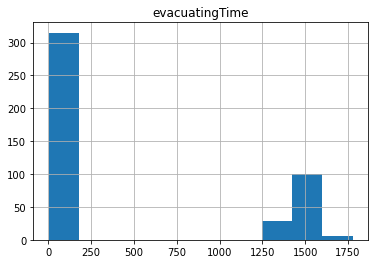

In [55]:
elderly.hist(column="evacuatingTime")

noRoomElderly = elderly[elderly["evacuatingTime"] > 5 * 60] # longer than 5 hours of evacuation
print(noRoomElderly)

In [40]:
noRoomYoung = young[young["evacuatingTime"] > 6 * 60] # longer than 6 hours of evacuation
noRoomYoung

,ID,age,completed,evacuatingTime,evacuating,flooded,x_home,y_home,x_loc,y_loc,dependent,dependentOf
15,1858720330076277601,11,TravelToDependent,1524.0,3,inWater,963357.451208,3.812582e+06,963223.518425,3.811365e+06,8964188773308324498,<none>
269,1838341389619385806,7,TravelToDependent,1560.0,3,inWater,963394.560692,3.812258e+06,963223.518425,3.811365e+06,2654046088241660943,<none>
293,-1075869749532657480,12,TravelToDependent,1496.0,3,notSubmerged,965421.624379,3.810842e+06,965291.824340,3.810987e+06,-4201661168380115397,<none>
383,9050042236217239943,0,TravelToDependent,1539.0,3,inWater,962236.704245,3.812081e+06,963223.518425,3.811365e+06,1633849468294062924,<none>
504,-5676949911892256889,5,TravelToDependent,1469.0,3,inWater,966351.570916,3.810443e+06,965911.307624,3.811385e+06,2109396141299278497,<none>
593,-376135205423529948,12,TravelToDependent,1484.0,3,inWater,963705.908457,3.811908e+06,963223.518425,3.811365e+06,-3149369951104291176,<none>
691,6428150619490924704,0,TravelToDependent,1475.0,3,inWater,963101.806114,3.812119e+06,963223.518425,3.811365e+06,657712563124006891,<none>
746,-4278759948463764198,1,TravelToDependent,1455.0,3,inWater,967692.127043,3.809941e+06,966942.680152,3.811716e+06,5790287841944114136,<none>
888,-8121591869110429174,10,TravelToDependent,1456.0,3,inWater,967585.616631,3.810566e+06,966942.680152,3.811716e+06,869997574739143098,<none>
899,-4296047878222494479,2,TravelToDependent,1453.0,3,inWater,963049.104770,3.812160e+06,963223.518425,3.811365e+06,1743823089583653388,<none>


In [49]:
results[results["completed"] == "TravelToDependent"]
#results

,ID,age,completed,evacuatingTime,evacuating,flooded,x_home,y_home,x_loc,y_loc,dependent,dependentOf
15,1858720330076277601,11,TravelToDependent,1524.0,3,inWater,963357.451208,3.812582e+06,963223.518425,3.811365e+06,8964188773308324498,<none>
41,-369236314160464817,13,TravelToDependent,1538.0,3,inWater,962335.501453,3.812164e+06,963223.518425,3.811365e+06,783806491102335412,<none>
61,-6886473413944403763,14,TravelToDependent,1457.0,3,inWater,965489.419753,3.809761e+06,964983.180984,3.809876e+06,840971693421031065,<none>
64,-3560895340241150572,13,TravelToDependent,-1.0,3,inWater,967675.424659,3.810402e+06,967675.424659,3.810402e+06,-1999648384144027407,<none>
73,-7084292089877263568,17,TravelToDependent,-1.0,3,inWater,967947.905557,3.810155e+06,967947.905557,3.810155e+06,4548787572202683532,<none>
...,...,...,...,...,...,...,...,...,...,...,...,...
1360,6936052602940298693,18,TravelToDependent,-1.0,3,inWater,967376.945951,3.809726e+06,967376.945951,3.809726e+06,-290432009781303997,<none>
1365,-2939377570560959799,2,TravelToDependent,-1.0,3,inWater,967924.942869,3.810731e+06,967924.942869,3.810731e+06,-1032876083032792701,<none>
1366,-8156666950725947070,9,TravelToDependent,1497.0,3,inWater,967364.138363,3.809927e+06,966942.680152,3.811716e+06,-5420088746722627361,<none>
1367,2674724006374503448,13,TravelToDependent,-1.0,3,inWater,963180.865865,3.812133e+06,963180.865865,3.812133e+06,-1385136515454466192,<none>


In [ ]:
#completes = results[results["completed"]=="COMPLETE"]
#completes["home"]

with open("dumbfileinc.txt", "w") as f:
    for x in incompletes["home"]:
        bits = x.split(",")
        f.write(bits[0].replace("(", "") + "\t" + bits[1] + "\n")
    
#for x in completes["home"]:
#    print(x.split(","))

In [ ]:
incompletes = results[results["completed"]=="INCOMPLETE"]
plt.scatter(incompletes["age"], incompletes["evacuatingTime"]/60.)

In [1]:
from ema_workbench import (Model, RealParameter, CategoricalParameter, ScalarOutcome, ArrayOutcome, ema_logging,
                           perform_experiments)
import subprocess
import pandas as pd
import math
import numpy as np

import matplotlib.pyplot as plt

/Users/swise/opt/anaconda3/envs/takamatsu/lib/python3.8/site-packages/ema_workbench/em_framework/evaluators.py:21: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn(
/Users/swise/opt/anaconda3/envs/takamatsu/lib/python3.8/site-packages/ema_workbench/em_framework/optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)


In [2]:
import os

In [10]:
def processMe(outputFilename, newOutputFilename, seed):
    
    results = pd.read_csv(outputFilename, sep="\t")
    
    r_evacs = results[results["evacuating"] > 0]
    countEvacuating = r_evacs.shape[0]
    if pd.isna(countEvacuating):
        countEvacuating = 0
    
    completes = r_evacs[r_evacs["completed"]=="Evacuated"]
    successful = completes.shape[0]
    if pd.isna(successful):
        successful = 0
        
    r_flooding = results[results["flooded"]=="inWater"]
    flooded = r_flooding.shape[0]
    if pd.isna(flooded):
        flooded = 0
    
    os.system('mv '+outputFilename+ ' ' + newOutputFilename)
    
    return {'trueseed': float(seed),
            'countEvacuating': float(countEvacuating), 
            'successfulEvacuations': float(successful),
            'flooded': float(flooded)}#,
#           'evacuatingTimes': [results['evacuatingTime']]}

def takamatsu_model(rawseed, agesEnabled ='true', neighbours = 'true', designated = 'true', flooding = 'RitsurinDemo/TakamatsuWaterFlooded.shp'):
    
    outputDir="/Users/swise/workspace/takamatsu/python/"
    
    seed = str(int(rawseed))
    subprocess.call(['java', '-Xms6G', '-jar', 'takamatsuABM.jar', seed, agesEnabled, outputDir, flooding, neighbours, designated])
    outputFilename = outputDir + seed + "_recordNoPlan.txt"
    newFloodName = flooding.split('/')[-1]
    newFloodName = newFloodName.split('.')[0]
    newOutputFilename = "output_bkup_" + seed + "_" + neighbours + "_" + designated + "_" + newFloodName + ".txt"
    #https://stackoverflow.com/questions/50938879/copy-file-rename-it-iterate-and-repeat
    #return { 'trueseed': 1., 'countEvacuating': 1., 'successfulEvacuations': 1., 'flooded': 1., 'evacuatingTimes': [1., 2.]}
    return processMe(outputFilename, newOutputFilename, seed)


In [ ]:
#takamatsu_model('123', 'true')
#subprocess.call(['java', '-jar', 'takamatsuABM.jar', seed, 'true', outputDir])

In [11]:
### ema_logging.LOG_FORMAT = '[%(name)s/%(levelname)s/%(processName)s] %(message)s'
ema_logging.log_to_stderr(ema_logging.INFO)

model = Model('takamatsuSim', function=takamatsu_model)  # instantiate the model

# specify uncertainties
model.uncertainties = [RealParameter('rawseed', 1, 10000),
                      CategoricalParameter('agesEnabled', ['true', 'false']),
                      CategoricalParameter('flooding', ['RitsurinDemo/TakamatsuWaterFlooded.shp', 'RitsurinDemo/TakamatsuTyphoon16.shp']),
                      CategoricalParameter('neighbours', ['true', 'false']),
                      CategoricalParameter('designated', ['true', 'false'])]

# specify outcomes
model.outcomes = [ScalarOutcome('trueseed'),
                 ScalarOutcome('countEvacuating'),
                 ScalarOutcome('successfulEvacuations'),
                 ScalarOutcome('flooded')]#,
#                 ArrayOutcome('evacuatingTimes')]

results = perform_experiments(model, 100)

[MainProcess/INFO] performing 100 scenarios * 1 policies * 1 model(s) = 100 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 10 cases completed
[MainProcess/INFO] 20 cases completed
[MainProcess/INFO] 30 cases completed
[MainProcess/INFO] 40 cases completed
[MainProcess/INFO] 50 cases completed
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 70 cases completed
[MainProcess/INFO] 80 cases completed
[MainProcess/INFO] 90 cases completed
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] experiments finished


In [1]:
results

NameError: name 'results' is not defined

In [ ]:
def some_model(x1=None, x2=None, x3=None):
    return {'y':x1*x2+x3}


In [ ]:
### ema_logging.LOG_FORMAT = '[%(name)s/%(levelname)s/%(processName)s] %(message)s'
ema_logging.log_to_stderr(ema_logging.INFO)

model = Model('takamatsuSim', function=some_model)#takamatsu_model)  # instantiate the model

model.uncertainties = [RealParameter("x1", 1, 10),
                       RealParameter("x2", 1, 10),
                       RealParameter("x3", 1, 10)]
#specify outcomes
model.outcomes = [ScalarOutcome('y')]

results = perform_experiments(model, 10)

In [ ]:
results

In [ ]:
plt.hist(results[1]['countEvacuating'])

In [ ]:
ageOn = results[0]['agesEnabled']
times = results[1]['evacuatingTimes']

ageTimes = times[ageOn == 'true']
nonAgeTimes = times[ageOn == 'false']

In [ ]:
mystuff = []
for a in ageTimes:
    raw = a[a > 0]
    mystuff.append(np.mean(raw))
plt.hist(mystuff)

In [ ]:
top = 20
weight = 40
bins = []
for i in range(10):
    bins.append(i * weight)
bins.append(top * weight)

In [ ]:
for r in results[1]['evacuatingTimes']:
    cleaned = r[r > 0]
    plt.hist(cleaned, alpha=.3, bins=bins)

In [ ]:
range(10)

In [ ]:
plt.scatter(results[0]['x1'], results[1]['y'])

In [ ]:
from ema_workbench.analysis.plotting import lines

figure = lines(results, density=True) #show lines, and end state density
plt.show() #show figure


=== Archive ===

In [ ]:
seed

In [ ]:
outputDir = "/Users/swise/Projects/hitomi/data/"
seed = str(12345)
outputFilename = outputDir + seed + "_record.txt"

results = pd.read_csv(outputFilename, sep="\t")

In [ ]:
#completes = results[results["completed"]=="COMPLETE"]
#completes["home"]

with open("dumbfileinc.txt", "w") as f:
    for x in incompletes["home"]:
        bits = x.split(",")
        f.write(bits[0].replace("(", "") + "\t" + bits[1] + "\n")
    
#for x in completes["home"]:
#    print(x.split(","))

In [ ]:
incompletes = results[results["completed"]=="INCOMPLETE"]
plt.scatter(incompletes["age"], incompletes["evacuatingTime"]/60.)

In [ ]:
plt.hist(incompletes["evacuatingTime"]/60)

In [ ]:
results["evacuatingTime"]